Epoch 1/15
480/480 [==============================] - 1s 2ms/step - loss: 0.6983 - accuracy: 0.8067 - val_loss: 0.2123 - val_accuracy: 0.9396
Epoch 2/15
480/480 [==============================] - 1s 2ms/step - loss: 0.2050 - accuracy: 0.9412 - val_loss: 0.1557 - val_accuracy: 0.9569
Epoch 3/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1440 - accuracy: 0.9587 - val_loss: 0.1325 - val_accuracy: 0.9615
Epoch 4/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1126 - accuracy: 0.9684 - val_loss: 0.1148 - val_accuracy: 0.9659
Epoch 5/15
480/480 [==============================] - 1s 1ms/step - loss: 0.0909 - accuracy: 0.9740 - val_loss: 0.1089 - val_accuracy: 0.9684
Epoch 6/15
480/480 [==============================] - 1s 1ms/step - loss: 0.0773 - accuracy: 0.9786 - val_loss: 0.1000 - val_accuracy: 0.9705
Epoch 7/15
480/480 [==============================] - 1s 1ms/step - loss: 0.0629 - accuracy: 0.9828 - val_loss: 0.0958 - val_accuracy: 0.9703
Epoch 

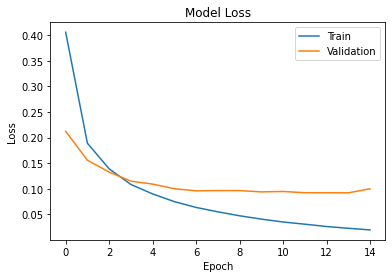

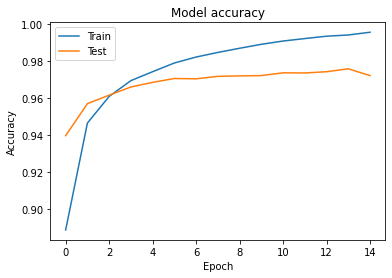

In [4]:
from keras import layers, models

def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape=(Nin,))
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layers.Activation('softmax')(layers.Dense(Nout)(h))
    model = models.Model(x, y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nout, activation='softmax'))
    model.coompile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)
        output = laysers.Dense(Nout)
        rely = laysers.Activation('relu')
        softmax = laysers.Activation('softmax')
        
        x = laysers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))
        
        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
        
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
        
import numpy as np
from keras import datasets
from keras.utils import np_utils

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
    
    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)
    
    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W*H)
    X_test = X_test.reshape(-1, W*H)
    
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, Y_train), (X_test, Y_test)

import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc=0)
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)
    
def main():
    Nin = 784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class
    
    model = ANN_seq_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()
    
    history = model.fit(X_train, Y_train, epochs=15,
                       batch_size=100, validation_split=0.2)
    performance_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performance_test)
    
    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()
    
if __name__ == '__main__':
    main()
    
    